<a href="https://colab.research.google.com/github/Mike-AG2021/Analisis-Inteligente-de-Datos/blob/main/Pyhton%20documentos/Caso_4_Arbol_de_datos_Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: "Jesús Miguel Acosta Gurrola"
# Date: "17/03/2022"


# Objetivo

Construir y evaluar un modelo de regresión lineal múltiple para realizar predicciones.

# Descripción

* Se cargan las librerías necesarias

* Se cargan los datos Se exploran los datos

* Se crear los datos de entrenamiento y validación 70% y 30% respectivamente
* Se construye el modelo con datos de entrenamiento
* Se evalúa el modelo
* Se hacen predicciones
* Se visualiza las prediciones vs los valores reales
* Se describe e intrepreta el modelo

## Las métricas a valorar serán:

* Que los coeficientes sean estadísticamente significativos por encima del 95%.

* R Squared Ajustado el modelo se acepta si sobrepasa en el 80%

* rmse comparado con otro modelo mismos datos se acepta o se establece que un modelo es mejor que otro.

* Comparaciones con el modelo de regresión lineal múltiple

# Fundamento teórico

Los árboles de regresión/clasificación tienen como objetivo predecir la variable respuesta Y en función de covariables. Los árboles de regresión permiten al igual que otros modelos de regresión predecir una variable dependiente Y en relación varias variables independentes Xs.




# Desarrollo



## Cargar librerías



In [62]:
import pandas as pd
import numpy as np
import statsmodels.api as sm # Estadístias R Adjused
import seaborn as sns  # Gráficos
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.datasets import 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

## Cargar datos



In [63]:
datos = datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising.csv")
datos

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Explorar datos


In [44]:
print("Observaciones y variables: ", datos.shape)
print("Columnas y tipo de dato")
# datos.columns
datos.dtypes


Observaciones y variables:  (200, 5)
Columnas y tipo de dato


Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

Se describen las variables independientes: TV, Radio Newpaper y la variable dependiente Sales.

Valor de etiqueta o variable objetivo deendiente(ventas):
que significa el volumen de ventas del producto correspondiente

Las variables independientes: (TV, Radio, Periódico):

TV: para un solo producto en un mercado determinado, el costo de la publicidad en TV (en miles)
Radio: costos de publicidad invertidos en medios de difusión
Periódico: costos publicitarios para medios periodísticos

In [108]:
datos[['TV','Radio', 'Newspaper', 'Sales']].describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Se unen todos los datos (predictores y variable respuesta en un único dataframe)


In [46]:
datos.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Se observa la relación lineal entre las variables independientes con respecto a ventas, de tal forma que es posible estimar visualmente que la variable Newspaper tal vez tenga poco impacto en las ventas esto por la alta dispersión de los datos. Sin embargo participará en el modelo de regresión lineal múltiple.


## Datos de entrenamiento y datos de validación 


Se identifican las variables que participan en el la partición de los datos de entrenamiento y validación.

Se parten los datos 70% datos de entrenamiento y 30% datos de validación


In [109]:
datos.iloc[:, 4:5]

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [110]:
print("Variables independientes ")
X_independientes = datos.iloc[:,1:4]
X_independientes




Variables independientes 


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [111]:
print ("Variable dependiente")
Y_dependiente = datos.iloc[:, 4:5]
Y_dependiente

Variable dependiente


,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


##Datos de entrenamiento y validación

In [112]:

X_entrena,X_valida,Y_entrena,Y_valida = train_test_split(X_independientes, Y_dependiente,train_size=.70,  random_state=4421)
 



### Datos de entrenamiento

Variables independientes


In [113]:
print("Estructura de datos de entrenamiento... ", X_entrena.shape)
print(X_entrena)
print(X_entrena[['TV']], X_entrena[['Radio']], X_entrena[['Newspaper']])


Estructura de datos de entrenamiento...  (140, 3)
        TV  Radio  Newspaper
2     17.2   45.9       69.3
133  219.8   33.5       45.1
10    66.1    5.8       24.2
110  225.8    8.2       56.5
5      8.7   48.9       75.0
..     ...    ...        ...
22    13.2   15.9       49.6
56     7.3   28.1       41.4
157  149.8    1.3       24.3
185  205.0   45.1       19.6
30   292.9   28.3       43.2

[140 rows x 3 columns]
        TV
2     17.2
133  219.8
10    66.1
110  225.8
5      8.7
..     ...
22    13.2
56     7.3
157  149.8
185  205.0
30   292.9

[140 rows x 1 columns]      Radio
2     45.9
133   33.5
10     5.8
110    8.2
5     48.9
..     ...
22    15.9
56    28.1
157    1.3
185   45.1
30    28.3

[140 rows x 1 columns]      Newspaper
2         69.3
133       45.1
10        24.2
110       56.5
5         75.0
..         ...
22        49.6
56        41.4
157       24.3
185       19.6
30        43.2

[140 rows x 1 columns]


## Creando el modelo
Crear a partir de los datos de entrenamiento el modelo de regresión lineal múltiple.

Se muestran los coeficientes: 



In [114]:
modelo_rm = LinearRegression()
 
modelo_rm.fit(X_entrena,Y_entrena)
 
print ("Intercepción o b0") 
b0 = modelo_rm.intercept_
print (b0)

print ("Coeficientes: b1, b2 y b3") 
# print (modelo_rm.coef_)
b1 = modelo_rm.coef_[0, 0:1]
b2 = modelo_rm.coef_[0, 1:2]
b3 = modelo_rm.coef_[0, 2:3]
print (b1, b2, b3)


Intercepción o b0
[2.99933863]
Coeficientes: b1, b2 y b3
[0.04578156] [0.19228539] [-0.0076749]


$$PrediccionY = b_0 + b_1{x_1} + b_2{x_2} + b_3{x_3}$$


## R Square y R Square ajustado a a partir del modelo

Sobrepasa el 80% de tal forma que el el modelo **SE ACEPA** por este criterio

In [115]:
print(modelo_rm.score(X_entrena, Y_entrena))

0.9036747498931927


## Predicciones

Se generan las predicciones a partir de los datos de validación, por lo que resulta las estimaciones con la función *predict()* del modelo de regresión múltiple.

In [116]:
predicciones = modelo_rm.predict(X_valida)
print(predicciones[:-1])
print(predicciones.shape)

[[16.31554142]
 [13.73438625]
 [14.14140344]
 [16.65214843]
 [ 6.53728939]
 [17.60517073]
 [ 5.66897981]
 [18.48412981]
 [20.44109624]
 [ 9.15479357]
 [14.26694071]
 [17.78183833]
 [ 8.62009962]
 [12.36854026]
 [ 6.00251424]
 [ 9.7803366 ]
 [19.00232586]
 [11.38178971]
 [12.7630549 ]
 [11.45991927]
 [15.56737626]
 [ 8.48647908]
 [17.42764947]
 [ 4.40711757]
 [11.92533507]
 [ 9.0616781 ]
 [19.14754647]
 [21.82019248]
 [17.22798772]
 [15.32840244]
 [20.62084245]
 [16.14568302]
 [20.62860713]
 [10.42357667]
 [20.02269596]
 [18.2465554 ]
 [23.60216217]
 [23.06851095]
 [23.88332847]
 [24.00297301]
 [14.18276464]
 [19.79211937]
 [10.33238076]
 [17.50393154]
 [12.47702696]
 [14.4829224 ]
 [ 8.9949468 ]
 [16.41704052]
 [13.88412282]
 [18.18610571]
 [14.18537916]
 [15.10035129]
 [10.57911559]
 [10.10064902]
 [16.0560401 ]
 [13.98593367]
 [ 8.13387489]
 [ 9.58551285]
 [16.47411083]]
(60, 1)


## Determinando métricas

Crear un data.frame llamado comparaciones a partir de la creación de un diccionario con los valores reales del conjunto de entrenamiento y las predicciones calculadas.

Se usa el *type()* para conocer el tipo de estructura de datos

Se usa el *assign()* para agregar columnas al df comparaciones

Se usa *flatten().tolist()* para convertir a una lsita de una dimensión.

Al final se tiene un *data.frame * llamado comparaciones que las últimas columnas tienen los valores reales de 'Sales' y las predicciiones en la variable 'Predicho'.


In [117]:
print(type(X_valida))
# print(X_valida)

print(type(predicciones))
# print(predicciones)


comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Sales_Real = Y_valida)
comparaciones = comparaciones.assign(Predicho = predicciones.flatten().tolist())
print(comparaciones)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
        TV  Radio  Newspaper  Sales_Real   Predicho
40   202.5   22.3       31.6        16.6  16.315541
174  222.4    3.4       13.1        11.5  13.734386
160  172.5   18.1       30.7        14.4  14.141403
194  149.7   35.6        6.0        17.3  16.652148
117   76.4    0.8       14.8         9.4   6.537289
102  280.2   10.1       21.4        14.8  17.605171
60    53.5    2.0       21.4         8.1   5.668980
184  253.8   21.3       30.0        17.6  18.484130
39   228.0   37.7       32.0        21.5  20.441096
66    31.5   24.6        2.2         9.5   9.154794
120  141.3   26.8       46.2        15.5  14.266941
105  137.9   46.4       59.0        19.2  17.781838
143  104.6    5.7       34.4        10.4   8.620100
179  165.6   10.0       17.6        12.6  12.368540
189   18.7   12.1       23.4         6.7   6.002514
151  121.0    8.4       48.7        11.6   9.780337
33   265.6   20.0        0.3        17.4  19.002326
88

#### R Square

Se obtienen el R Square con las predicciones

In [118]:
print('R Square :', r2_score(comparaciones['Sales_Real'], comparaciones['Predicho'] ))


R Square : 0.8747511975355455


El valor de *R Square* ESTÁ POR ENCIMA del 80%, por lo cual, por este criterio el modelo **SI SE ACEPTA.**

#### rmse

$$
rmse = \sqrt{\frac{\sum(predicho_i - real_i)^{2}}{n}}
$$




In [119]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(Y_valida, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Y_valida, predicciones)))


Mean Squared Error: MSE 3.261014003951915
Root Mean Squared Error RMSE: 1.8058277891183077


Habrá que comparar e valor de RMSE con otro modelo y será más eficiente aquel que se acerque a cero


### División de los datos en Sales Real y Predicho

Para poder hacer la posterior evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de predicción.



In [122]:
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Sales_Real = Y_valida)
comparaciones = comparaciones.assign(Predicho = predicciones.flatten().tolist())
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 4421
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_entrena, Y_entrena)

DecisionTreeRegressor(max_depth=3, random_state=4421)

# Estructura del árbol creado

Profundidad del árbol: 3
Número de nodos terminales: 8


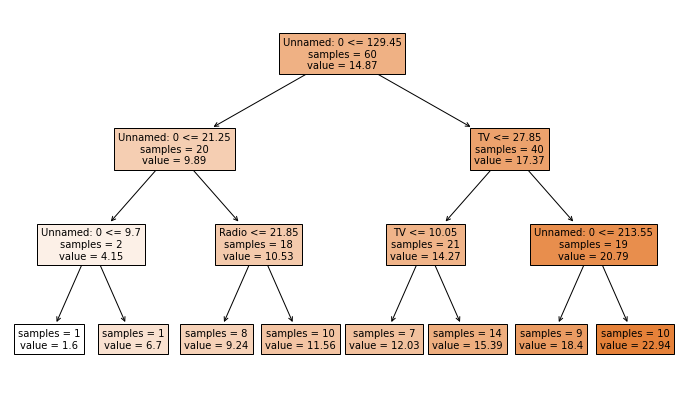

In [128]:

# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 7))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo.fit(X_valida, Y_valida),
            feature_names = datos.drop(columns = "Sales").columns,
            class_names   = 'Sales',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

# Interpretación 

Se realizo  el análisis de los datos y creacion del arbol de regresion.
El análisis de datos fue con el conjunto de datos de “Advertising”. 
Los datos se encuentran en la dirección https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising.csv.

En este análisis de datos usamos un conjunto de datos que es del conjunto de datos que abarca(TV, Sales, Newspaper, Radio). 
Para este análisis usamos los árboles de regresión y clasificación que tienen como objetivo predecir la variable respuesta Y en función de covariables, se uso como variable dependiente es “Sales” en este data.frame contamos con 200 observaciones y 4 variables, pero dentro de este se distribuye en datos.entrenamiento con 142 observaciones y 4 variables, y en datos.validación con 58 observaciones y 4 variables cabe mencionar que las variables independientes de inversión son en TV, Radio o Newspaper. La variable que es estadisticamente significativa es “Sales” al realizar la evaluación del modelo podemos notar que esta por encima del 90% lo que esto nos indica que es un buen modelo y y una buena predicción que esta en 94% con una evaluación por encima de 95% .Dependiendo de la variable el modelo del arbol va evaluando la construcción para calcular el valor.

Tenemos la comparación del modelo de regresión lineal que es el método mas usado en estadística para predecir valores de variables continuas debido a su facil interpretación, pero en muchas situaciones los estandares de el modelo no se cumplen y por consiguiente se tiende a forzar el modelo, llevando a conclusiones erroneas. Los arboles de regresión son una alternativa que no requiere realizar una predicción al azar sobre los datos a analizar y es un metodo de facil interpretación de los resultados. Como en este caso al visualizar el arbol de regresión